In [3]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

## Overview
- groupby로 그룹을 생성
- 그룹 : 범주형(categorical) 데이터를 이용 ; 연속형 변수 : 양자화해서 사용
- agg/ transform / apply 메소드로 그룹 연산
- 연속형 변수를 양자화
- pd.pivot_table 함수 : pivot + groupby
- pd.crosstab 
- 실습 : 주가 데이터, 대통령 후보 기부 데이터

___
#### 0328
### 그룹 연산
- grouped = df.groupby(keys)[cols]
- aggregation : mean, sum 등 모든 성분을 적용. 
	- 집계의 의미
	- group 별 통계량 등 list로 여러 개 지정 가능.
	- groupby.agg(sum) 각 그룹에 적용, 그리고 combine 과정을 거친 후에 다시 df으로 나온다.
	- column 별로 다른 통계량을 제공할 수 있다. ex) 과목에 따라 다르게 통계량 지정 가능. 평균, 표준편차, 분산
    - 행을 축소하기 때문에 차원 축소됨.
    - 여러 개의 함수 전달 시 list로 전달. ex) ['func1', 'func2']
- transform : +1, -1 등 각 성분에 각각 적용. 변환의 의미
- apply : 위 두 개를 전부 가지고 있음.
- 병합 연산 시 색인이 사라짐.

#### Groupby
- axis = 1 인 경우는 몰라도됨. default 값 = 0
- groupby 변수 = class, key
- 그룹 key : 주로 index를 사용함.
- head, tail 이용 가능.
- nth 함수는 각 그룹의 n번째 성분을 조회할 수 있음.
- 병합함수
    - mean, sum, median 등의 연속형 데이터 처리 함수에서 범주형 데이터는 연산결과 자동적으로 제외된다.
    - count, first, last, head, tail
    - size

#### apply
- 그룹연산 단계에서 여러가지를 적용 시키는 단계
- aggregation, transform 등도 결국은 apply의 의미
- split - apply - combine 규칙을 따르는 함수
- ex) top5 : transform, aggregation이 아닌 여러 개의 열에서 특정 value만 추출

#### group key의 형태 :
- 그룹으로 묶을 축의 길이와 동일한 길이의 리스트나 배열
- DataFrame의 column을 지칭하는 값
- dict, Series 객체
- 축 색인 또는 색인 내의 개별 이름에 대해 실행되는 함수
- DataFrame을 전달할 수는 없다.
- 연속형 데이터는 양자화해서 만듦. ex) Age : youth, middle, senior
- 양자화 변환함수 : cut, qcut

#### pivot_table
- 그룹과 agg의 결합
- margine을 계산함. 그룹 별 전체합, 전체평균 등

#### crosstab
- 그룹 빈도를 계산하기 위한 피벗 테이블의 특수한 형태

#### groupby operation

In [5]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.007189,0.886429
1,a,two,-1.296221,-2.001637
2,b,one,0.274992,-0.371843
3,b,two,0.228913,1.669025
4,a,one,1.352917,-0.438570


In [6]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [7]:
grouped.mean()

key1
a    0.354628
b    0.251952
Name: data1, dtype: float64

In [8]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     1.180053
      two    -1.296221
b     one     0.274992
      two     0.228913
Name: data1, dtype: float64

In [9]:
means.unstack()

key2,one,two
key1,,
a,1.180053,-1.296221
b,0.274992,0.228913


- 아래와 같이 길이가 같은 Series라면 연산할 때 문제없다.

In [10]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005   -1.296221
            2006    0.274992
Ohio        2005    0.618051
            2006    1.352917
Name: data1, dtype: float64

- 아래의 경우 mean() 함수가 사용되기 때문에, 범주형 변수인 key2는 제외된다.

In [11]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.354628,-0.517926
b,0.251952,0.648591


In [ ]:
for k, group

In [12]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   1.180053  0.223930
     two  -1.296221 -2.001637
b    one   0.274992 -0.371843
     two   0.228913  1.669025

size()
- 그룹별 크기를 값으로 하는 Series를 반환.
- 현재는 그룹의 색인에서 누락된 값은 결과에서 제외되나, 추후 Na 그룹을 결과에 포함시키도록하는 옵션이 추가될 예정.
- df.size와 다른 함수이다.

In [13]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [15]:
df.groupby(['key1', 'key2']).count() # df 유지해주고, 결측치 여부를 판단하여 제외하고 count.

data1  data2
key1 key2              
a    one       2      2
     two       1      1
b    one       1      1
     two       1      1

### Iterating over groups
- 그룹 iterating

In [16]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  1.007189  0.886429
1    a  two -1.296221 -2.001637
4    a  one  1.352917 -0.438570
b
  key1 key2     data1     data2
2    b  one  0.274992 -0.371843
3    b  two  0.228913  1.669025


In [17]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  1.007189  0.886429
4    a  one  1.352917 -0.438570
('a', 'two')
  key1 key2     data1     data2
1    a  two -1.296221 -2.001637
('b', 'one')
  key1 key2     data1     data2
2    b  one  0.274992 -0.371843
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.228913  1.669025


- 매 반복마다 key,value를 쌍으로 반환해준다.

In [18]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,0.274992,-0.371843
3,b,two,0.228913,1.669025


In [19]:
df.dtypes # col에 따라 dtype이 다르므로 df.dtype이 아닌 df.dtypes를 해야한다.

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [20]:
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0  1.007189  0.886429
 1 -1.296221 -2.001637
 2  0.274992 -0.371843
 3  0.228913  1.669025
 4  1.352917 -0.438570, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

- groupby 객체의 key는 groupby.key() 함수로 접근 가능

In [24]:
dict_grouped = dict(list(grouped))
dict_grouped


# dtype('float64') X
# np.dtype('float64')
# 

{dtype('float64'):       data1     data2
 0  1.007189  0.886429
 1 -1.296221 -2.001637
 2  0.274992 -0.371843
 3  0.228913  1.669025
 4  1.352917 -0.438570, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [26]:
dict_grouped.keys()# str이 아닌 np.array 형식임.

dict_keys([dtype('float64'), dtype('O')])

### Selecting a column or subset of columns

In [ ]:
df['data1'].groupby(df['key1'])
df.groupby('key1')['data1'] # Series
df.groupby('key1')[['data1']] # DataFrame

In [34]:
df['data1']

0    1.007189
1   -1.296221
2    0.274992
3    0.228913
4    1.352917
Name: data1, dtype: float64

In [35]:
df['data1'].groupby('key1') # key1

KeyError: 'key1'

In [36]:
df['key1'] # 따라서 df['data1'].groupby(df['key1'])을 써야한다.

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

In [22]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [ ]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [ ]:
df.groupby(['key1', 'key2'])[['data2']].mean()

In [ ]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [ ]:
s_grouped.mean()

### Grouping with dicts and Series

In [32]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.ix[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,a,b,c,d,e
Joe,-1.332610,1.074623,0.723642,0.690002,1.001543
Steve,-0.503087,-0.622274,-0.921169,-0.726213,0.222896
Wes,0.051316,NaN,NaN,0.433610,1.010737
Jim,1.824875,-0.997518,0.850591,-0.131578,0.912414
Travis,0.188211,2.169461,-0.114928,2.003697,0.029610


In [ ]:
df['data1'].groupby(df['key1'])
df.groupby('key1')['data1'] # Series
df.groupby('key1')[['data1']] # DataFrame

In [28]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [29]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,2.227716,-0.639844
Steve,0.524712,1.770545
Wes,-1.860761,-1.574301
Jim,-0.943685,-0.372906
Travis,-2.512731,-3.865992


In [30]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [33]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### Grouping with functions

In [37]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.543582,0.077104,1.574233,0.992034,2.924695
5,-0.503087,-0.622274,-0.921169,-0.726213,0.222896
6,0.188211,2.169461,-0.114928,2.003697,0.029610


In [38]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.332610  1.074623  0.723642  0.433610  1.001543
  two  1.824875 -0.997518  0.850591 -0.131578  0.912414
5 one -0.503087 -0.622274 -0.921169 -0.726213  0.222896
6 two  0.188211  2.169461 -0.114928  2.003697  0.029610

### Grouping by index levels

In [39]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.795253  0.118110 -0.748532  0.584970  0.152677
1     -1.565657 -0.562540 -0.032664 -0.929006 -0.482573
2     -0.036264  1.095390  0.980928 -0.589488  1.581700
3     -0.528735  0.457002  0.929969 -1.569271 -1.022487

In [40]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


### tip 데이터

In [11]:
%pwd

'C:\\Users\\tmznq\\workspace\\ml_scratch\\seoul_coding_academy\\week4'

In [17]:
path = 'C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch08/tips.csv'

tips = pd.read_csv(path)

In [18]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


### 성별에 따른 흡연 여부 grouping
- sex와 smoker를 구분해서, tip_pct의 평균을 구해보면?
- 음식값의 합 대비 tip의 합을 구하는 것이 적절하다. 

1. sex와 smoker를 그룹키로 하여 그룹핑
2. 각 그룹별로 bill과 tip의 합계를 구한다.
3. tip합계를 bill합계로 나눈다.
4. 그래프로 나타낸다.

In [19]:
tip_group = tips.groupby(['sex', 'smoker'])
tip_group

In [20]:
for name, group in tips.groupby(['sex', 'smoker']):
    print(name)
    print(group)

('Female', 'No')
     total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
14        14.83  3.02  Female     No   Sun  Dinner     2  0.203641
16        10.33  1.67  Female     No   Sun  Dinner     3  0.161665
18        16.97  3.50  Female     No   Sun  Dinner     3  0.206246
21        20.29  2.75  Female     No   Sat  Dinner     2  0.135535
22        15.77  2.23  Female     No   Sat  Dinner     2  0.141408
29        19.65  3.00  Female     No   Sat  Dinner     2  0.152672
32        15.06  3.00  Female     No   Sat  Dinner     2  0.199203
33        20.69  2.45  Female     No   Sat  Dinner     4  0.118415
37        16.93  3.07  Female     No   Sat  Dinner     3  0.181335
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
52        34.81  5.20  Female     No   Sun  D

In [21]:
# tip_sum = tip_group(tips['total_bill','tip']).sum()

In [22]:
tips.keys[]

SyntaxError: invalid syntax (<ipython-input-22-b3bb081e0133>, line 1)

In [23]:
tip_sum = tip_group[['total_bill', 'tip']].sum()
tip_sum

total_bill     tip
sex    smoker                    
Female No          977.68  149.77
       Yes         593.27   96.74
Male   No         1919.75  302.00
       Yes        1337.07  183.07

In [24]:
tip_sum['tip_rate'] = tip_sum.tip / tip_sum.total_bill

In [25]:
tip_sum

total_bill     tip  tip_rate
sex    smoker                              
Female No          977.68  149.77  0.153189
       Yes         593.27   96.74  0.163062
Male   No         1919.75  302.00  0.157312
       Yes        1337.07  183.07  0.136919

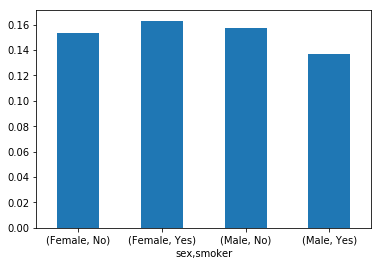

In [26]:
tip_sum['tip_rate'].plot(kind = 'bar', rot=0)

In [90]:
# time에따른 bill의 min max mean와 tip의 min max mean을 구해보자.
# 성별건수 size와 평균 고객 size의 수.

In [94]:
# tg = tips.groupb('time')
# tg.agg(['min', 'max']) # str로 적었지만 df 내의 함수라면 함수로 적용이 가능하다.

In [93]:
# tsg['size'].size() # 여러 개의 값을 빈도수로 축소시켜주는 함수.
# tsg.agg('size') 
# tsg.agg(['size', 'mean']) # 2가지 함수 적용할 때.

- DataFrame의 병합 함수들 (min, max, mean, median, size 등)을 agge의 인자로 여러 개 넣을 때는 문자열로 전달해야한다.

In [ ]:
pd.concat({key: value}) # dict로 key, value 정해서 합치기 가능.